# Lab 7.01 - Time series analysis

In [1]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 1 - House sales

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()
data.tail()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16800\4112006498.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
aug/11,290
sep/11,302
okt/11,307
nov/11,314
dec/11,307


First Create a time series chart of the data.

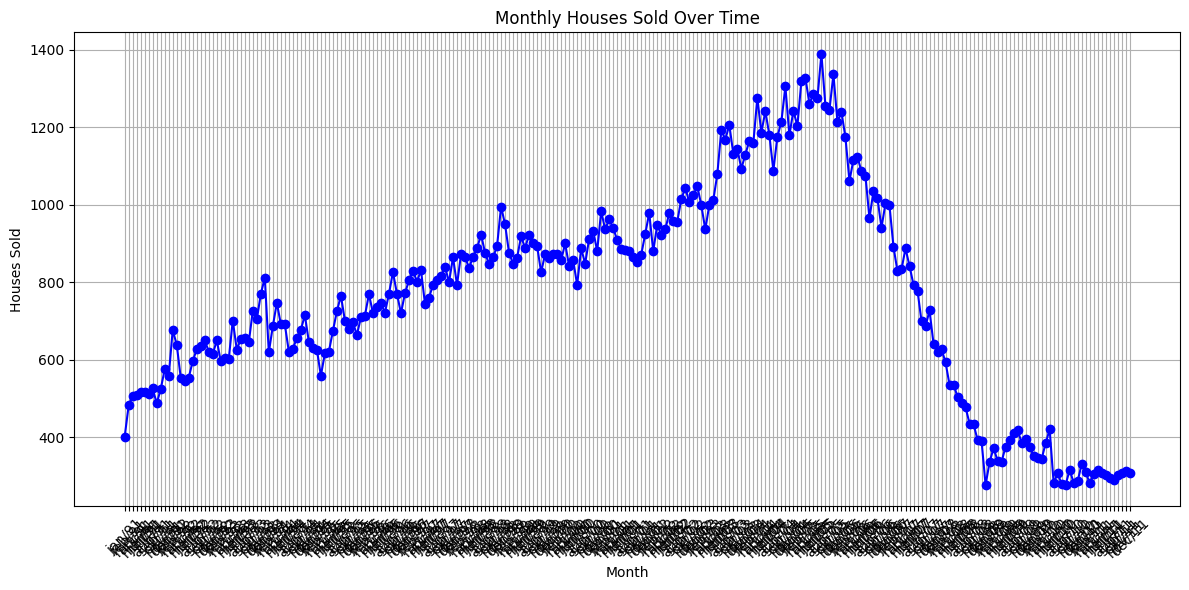

In [5]:
# create a times series chart

# Houses Sold
# Month	
# jan/91	401
# feb/91	482
# mrt/91	507
# apr/91	508
# mei/91	517

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Houses Sold'], marker='o', linestyle='-', color='b')
plt.title('Monthly Houses Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Houses Sold')
plt.xticks(rotation=45)
plt.grid()  
plt.tight_layout()
plt.show()

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

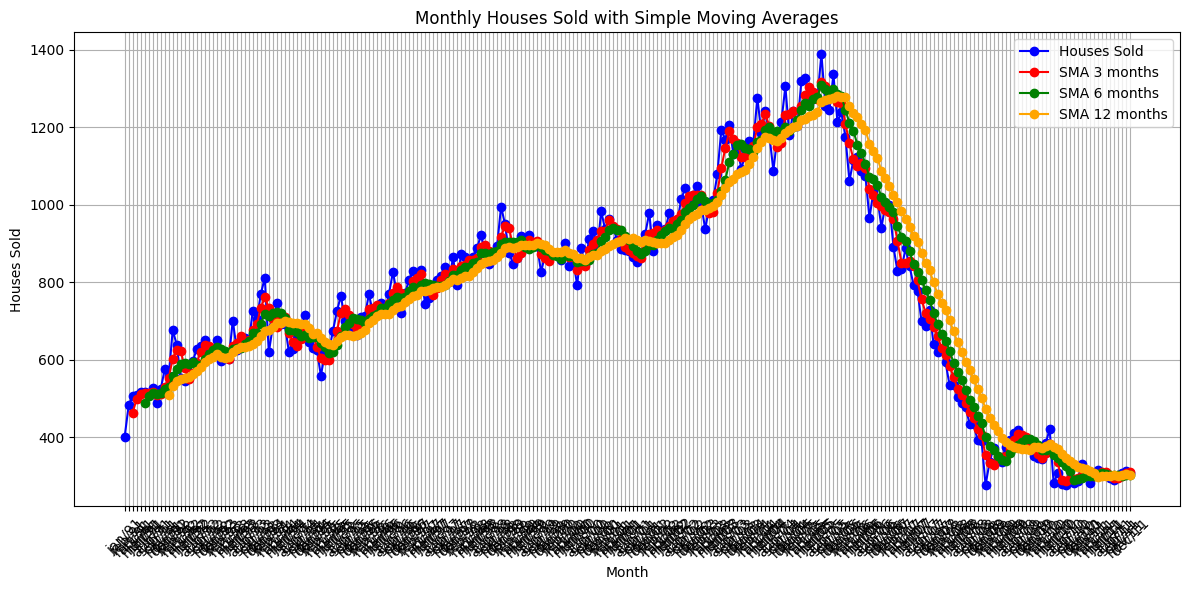

In [16]:
# Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

data['SMA_3'] = data['Houses Sold'].rolling(window=3).mean()
data['SMA_6'] = data['Houses Sold'].rolling(window=6).mean()
data['SMA_12'] = data['Houses Sold'].rolling(window=12).mean()
# Plot the original data and the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Houses Sold'], marker='o', linestyle='-', color='b', label='Houses Sold')
plt.plot(data.index, data['SMA_3'], marker='o', linestyle='-', color='r', label='SMA 3 months')
plt.plot(data.index, data['SMA_6'], marker='o', linestyle='-', color='g', label='SMA 6 months')
plt.plot(data.index, data['SMA_12'], marker='o', linestyle='-', color='orange', label='SMA 12 months')
plt.title('Monthly Houses Sold with Simple Moving Averages')
plt.xlabel('Month')
plt.ylabel('Houses Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Add predictions for Simple Exponential Smooting to the dataframe.

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


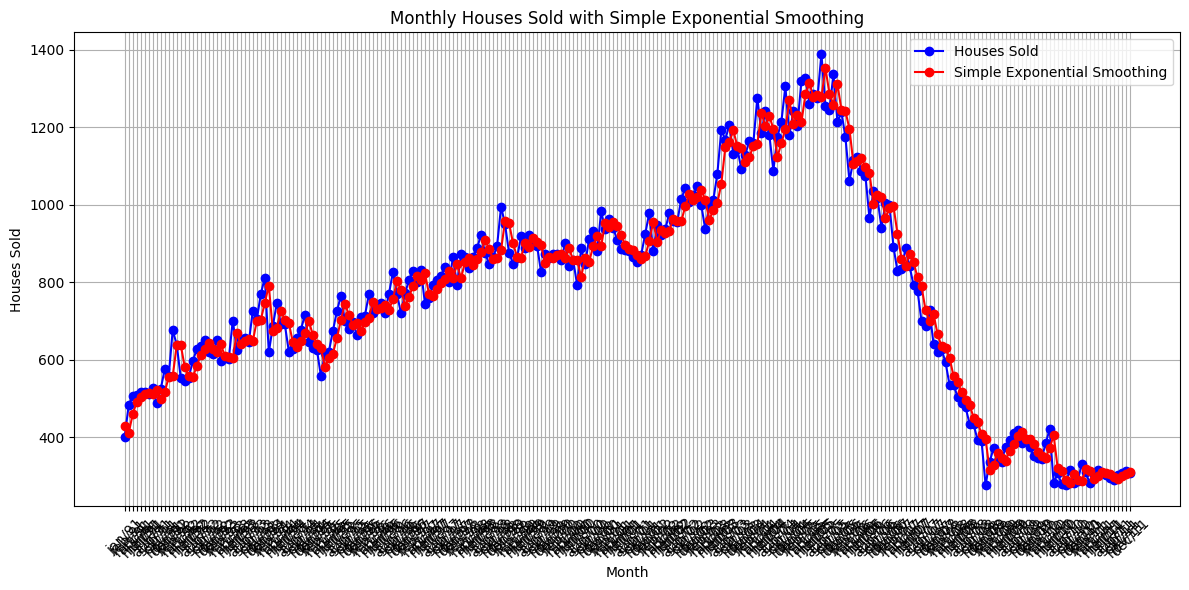

In [11]:
# Add predictions for Simple Exponential Smooting to the dataframe.

model = ExponentialSmoothing(data['Houses Sold'], trend=None, seasonal=None, initialization_method='estimated')
fit = model.fit()
data['SES'] = fit.fittedvalues
# Plot the original data and the Simple Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Houses Sold'], marker='o', linestyle='-', color='b', label='Houses Sold')
plt.plot(data.index, data['SES'], marker='o', linestyle='-', color='r', label='Simple Exponential Smoothing')
plt.title('Monthly Houses Sold with Simple Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Houses Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Add predictions for Double Exponential Smoothing to the dataframe.

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


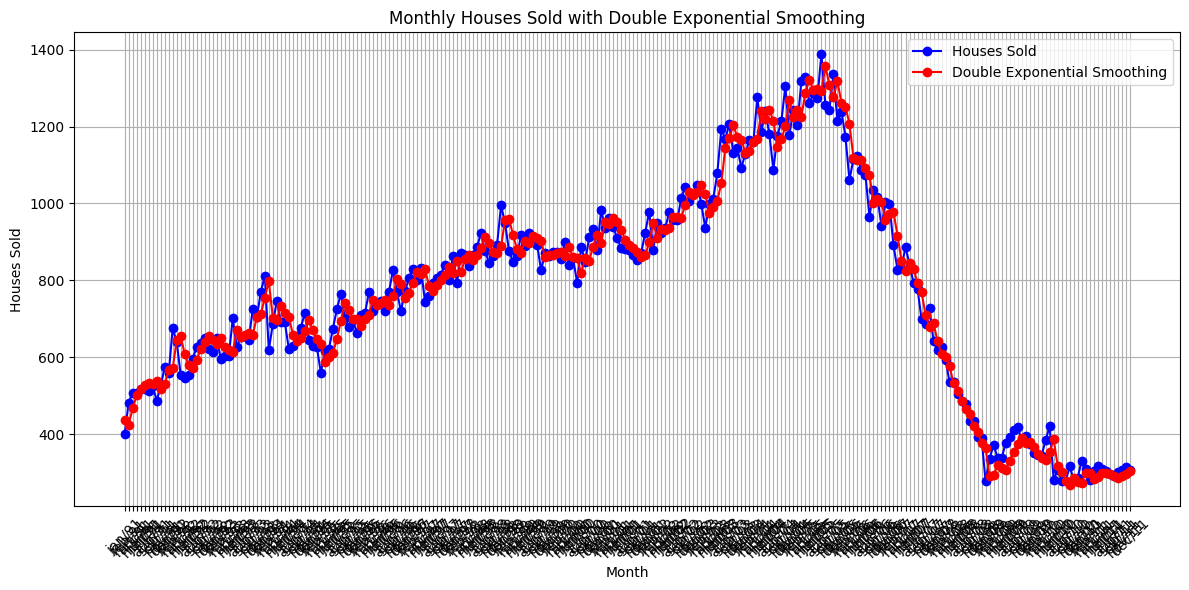

In [9]:
# Add predictions for Double Exponential Smoothing to the dataframe.
model = Holt(data['Houses Sold'], initialization_method='estimated')
fit = model.fit()
data['DES'] = fit.fittedvalues
# Plot the original data and the Double Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Houses Sold'], marker='o', linestyle='-', color='b', label='Houses Sold')
plt.plot(data.index, data['DES'], marker='o', linestyle='-', color='r', label='Double Exponential Smoothing')
plt.title('Monthly Houses Sold with Double Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Houses Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Calculate the MAE to find the best model. First drop the rows with NaN.

In [18]:
# calculate the mae to find the best model. first drop rows with NaN values
data = data.dropna()
mae_ses = mean_absolute_error(data['Houses Sold'], data['SES'])
mae_des = mean_absolute_error(data['Houses Sold'], data['DES'])
print(f'Mean Absolute Error for Simple Exponential Smoothing: {mae_ses}')
print(f'Mean Absolute Error for Double Exponential Smoothing: {mae_des}')

Mean Absolute Error for Simple Exponential Smoothing: 38.4197877226048
Mean Absolute Error for Double Exponential Smoothing: 37.76181109942324


In [14]:
columns = ['SMA_3', 'SMA_6', 'SMA_12', 'SES', 'DES']

In [19]:
# columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

# Calculate the Mean Absolute Error for each model
mae_values = {col: mean_absolute_error(data['Houses Sold'], data[col]) for col in columns}
# Create a DataFrame to display the results
mae_df = pd.DataFrame(list(mae_values.items()), columns=['Model', 'MAE'])
# Sort the DataFrame by MAE
mae_df = mae_df.sort_values(by='MAE')
# Print the DataFrame
print(mae_df)

    Model        MAE
0   SMA_3  26.431535
1   SMA_6  36.811203
4     DES  37.761811
3     SES  38.419788
2  SMA_12  54.415629


## Source
Business Analytics Data Analysis & Decision Making 